<a href="https://colab.research.google.com/github/shreyaaaaaa21/emotion_sensitive_chatbot/blob/main/EMOTION_SENSITIVE_CHATBOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

from transformers import pipeline

# Load a pre-trained model for emotion detection
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Example: Test with sample text input
text = "I am feeling really sad and tired."
emotions = emotion_classifier(text)

# Output the emotions detected
for emotion in emotions:
    print(f"Emotion: {emotion['label']}, Score: {emotion['score']:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Emotion: sadness, Score: 0.9901


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, LSTM, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Conv3D, MaxPooling3D, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D # import convolutional layers from keras.layers
#from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from tensorflow.keras.optimizers import Adam # Use Adam from tensorflow.keras.optimizers
from keras.layers import Dropout

In [ ]:

Ravdess = "/content/archive (7).zip"

In [ ]:
import os
import pandas as pd
import zipfile

# Define the path to the zip file
zip_file_path = r"/content/archive (7).zip"
extract_dir = r"/content/ravdess_extracted/"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Now use the extracted directory
ravdess_directory_list = os.listdir(extract_dir)
file_emotion = []
file_statement = []
file_path = []

for dir in ravdess_directory_list:
    # As there are 20 different actors in our previous directory, we need to extract files for each actor.
    actor = os.listdir(os.path.join(extract_dir, dir))
    for file in actor:
        part = file.split('.')[0].split('-')

        # Check if the file has enough parts
        if len(part) >= 5:
            # Third part represents the emotion, fifth represents the statement
            file_emotion.append(int(part[2]))
            file_statement.append(int(part[4]))
            file_path.append(os.path.join(extract_dir, dir, file))
        else:
            print(f"File {file} does not match the expected naming convention. Skipping...")

# Creating a DataFrame for emotions and file paths
Ravdess_df = pd.DataFrame({"Emotions": file_emotion, "Statement": file_statement, "Path": file_path})

# Replacing integer emotion codes with actual emotion labels
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Display the first few rows of the DataFrame
Ravdess_df.head()


File Actor_17 does not match the expected naming convention. Skipping...
File Actor_13 does not match the expected naming convention. Skipping...
File Actor_05 does not match the expected naming convention. Skipping...
File Actor_16 does not match the expected naming convention. Skipping...
File Actor_19 does not match the expected naming convention. Skipping...
File Actor_23 does not match the expected naming convention. Skipping...
File Actor_11 does not match the expected naming convention. Skipping...
File Actor_02 does not match the expected naming convention. Skipping...
File Actor_08 does not match the expected naming convention. Skipping...
File Actor_21 does not match the expected naming convention. Skipping...
File Actor_06 does not match the expected naming convention. Skipping...
File Actor_24 does not match the expected naming convention. Skipping...
File Actor_07 does not match the expected naming convention. Skipping...
File Actor_12 does not match the expected naming co

,Emotions,Statement,Path
0,disgust,1,/content/ravdess_extracted/Actor_17/03-01-07-0...
1,angry,1,/content/ravdess_extracted/Actor_17/03-01-05-0...
2,angry,2,/content/ravdess_extracted/Actor_17/03-01-05-0...
3,angry,1,/content/ravdess_extracted/Actor_17/03-01-05-0...
4,sad,2,/content/ravdess_extracted/Actor_17/03-01-04-0...


In [ ]:
Ravdess_df.shape

(1440, 3)

In [ ]:
Ravdess_df.groupby(['Emotions','Statement']).size().unstack()

Statement,1,2
Emotions,,
angry,96,96
calm,96,96
disgust,96,96
fear,96,96
happy,96,96
neutral,48,48
sad,96,96
surprise,96,96


In [ ]:
# creating a copy
data_path = Ravdess_df[['Emotions','Path']].copy()
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,/content/ravdess_extracted/Actor_17/03-01-07-0...
1,angry,/content/ravdess_extracted/Actor_17/03-01-05-0...
2,angry,/content/ravdess_extracted/Actor_17/03-01-05-0...
3,angry,/content/ravdess_extracted/Actor_17/03-01-05-0...
4,sad,/content/ravdess_extracted/Actor_17/03-01-04-0...


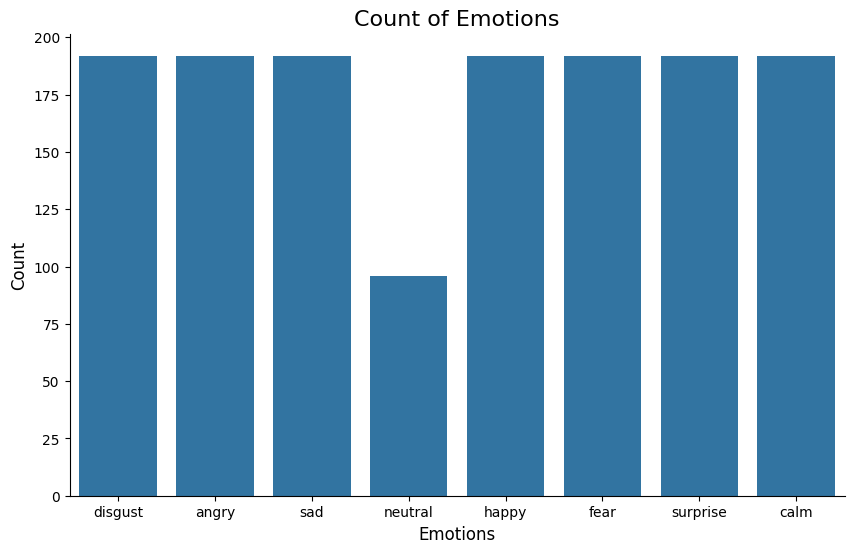

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# Set plot title and labels
plt.title('Count of Emotions', size=16)

# Create the countplot
sns.countplot(x='Emotions', data=Ravdess_df)

# Set x and y labels
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


In [ ]:
def create_waveplot(data, sr):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

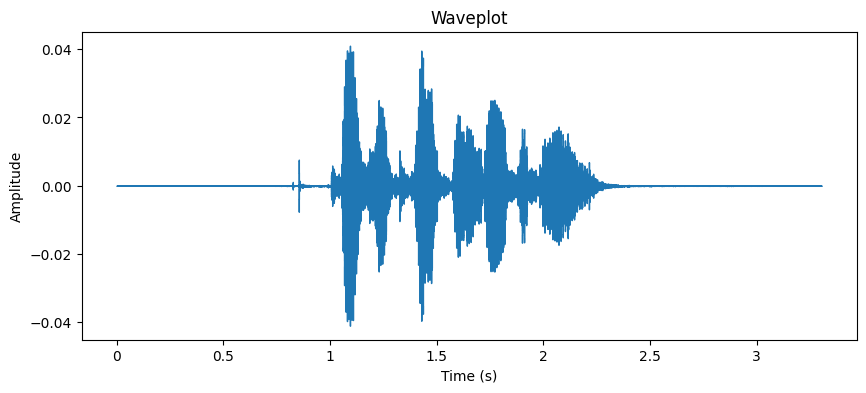

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Specify the path to an audio file (replace with an actual file)
path = "/content/ravdess_extracted/Actor_01/03-01-01-01-01-01-01.wav"

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create a waveplot
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveplot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
Audio(path)


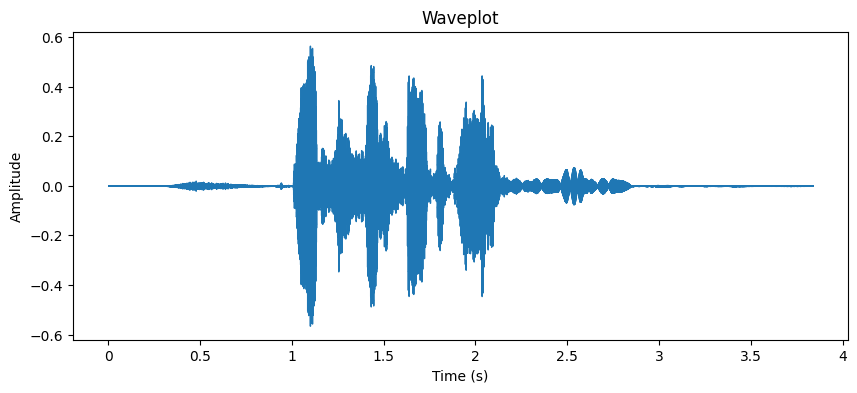

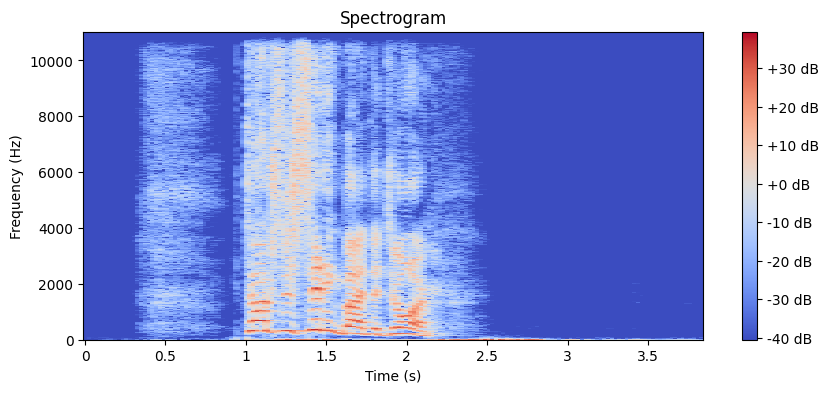

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Function to create waveplot
def create_waveplot(data, sampling_rate):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title('Waveplot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to create spectrogram
def create_spectrogram(data, sampling_rate):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Define the emotion you want to filter
emotion = 'fear'

# Filter the dataset to get the path of the first file with the specified emotion
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create the waveplot
create_waveplot(data, sampling_rate)

# Create the spectrogram
create_spectrogram(data, sampling_rate)

# Play the audio file
Audio(path)


In [ ]:
# Get unique emotions from the DataFrame
unique_emotions = Ravdess_df.Emotions.unique()
print(unique_emotions)


['disgust' 'angry' 'sad' 'neutral' 'happy' 'fear' 'surprise' 'calm']


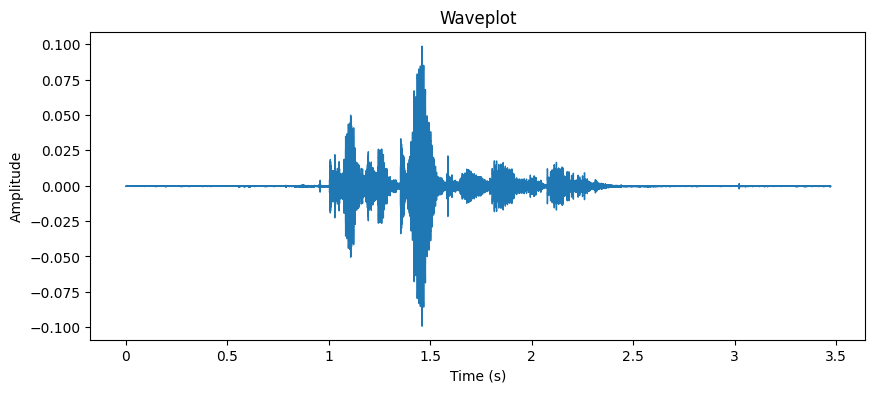

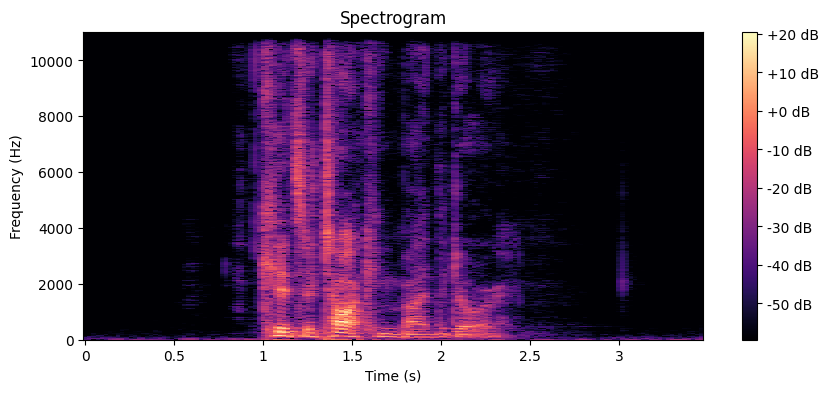

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Function to create waveplot
def create_waveplot(data, sampling_rate):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title('Waveplot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to create spectrogram
def create_spectrogram(data, sampling_rate):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Define the emotion you want to filter
emotion = 'angry'

# Filter the dataset to get paths of files with the specified emotion
emotion_files = np.array(Ravdess_df.Path[Ravdess_df.Emotions == emotion])

# Check if there are any files for the specified emotion
if len(emotion_files) > 0:
    path = emotion_files[0]  # Get the first file
else:
    raise ValueError(f"No files found for emotion: {emotion}")

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create the waveplot
create_waveplot(data, sampling_rate)

# Create the spectrogram
create_spectrogram(data, sampling_rate)

# Play the audio file
Audio(path)


In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.85):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

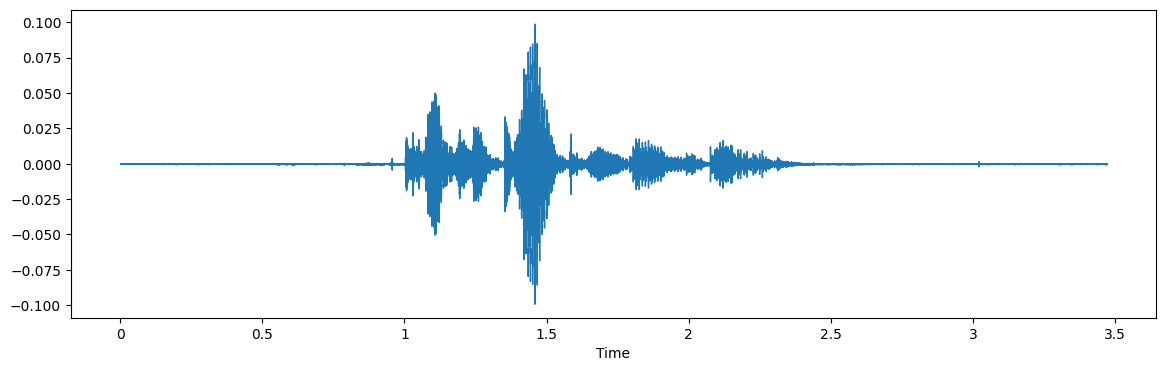

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

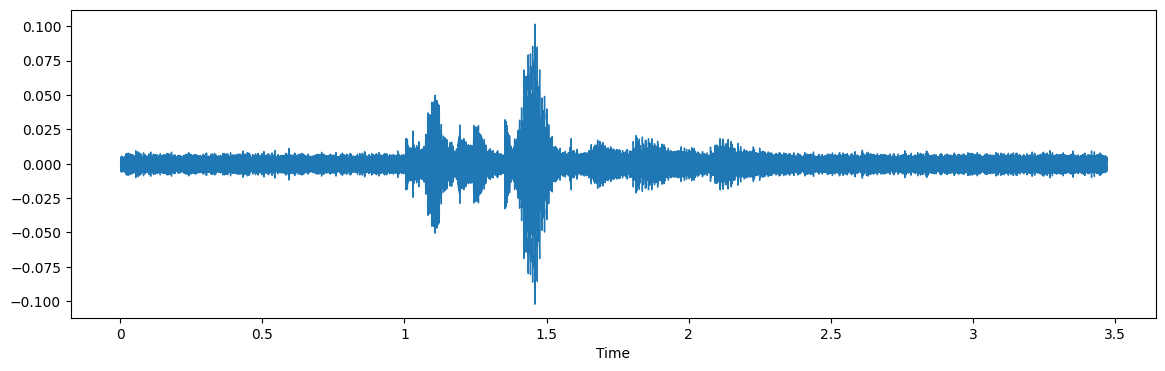

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
!pip install opencv-python
!pip install tensor flow
!pip install numpy
!pip install pandas
!pip install keras
!pip install adam
!pip install kwargs
!pip install cinit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs
  Preparing metadata (setup.py) ... done
  Created wheel for cinit: filename=cinit-0.1.0-py3-none-any.whl size=2469 sha256=2529f8b6827af1f2fc6568533b7bd4b5757018967f7ffbd8

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils
from keras.utils import to_categorical


In [ ]:

df = pd.read_csv('/content/archive (6).zip', compression='zip')

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
print(df.info())
print(df["Usage"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

In [ ]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
# model.summary()

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

# Check if the images are grayscale (1 channel), and convert them to RGB (3 channels)
if X_train.shape[-1] == 1:
    X_train_rgb = np.repeat(X_train, 3, axis=-1)  # Convert grayscale to RGB by repeating the single channel 3 times
else:
    X_train_rgb = X_train  # Already RGB

# Load the pre-trained VGG16 model with ImageNet weights (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Define the model architecture
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Data augmentation
gen = ImageDataGenerator()

# Create a generator for training data
train_generator = gen.flow(X_train_rgb[:train_y.shape[0]], train_y, batch_size=batch_size)

# Train the model with 5 epochs
model.fit(train_generator, steps_per_epoch=len(train_y) // batch_size, epochs=2)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.2455 - loss: 1.8930
Epoch 2/2
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 156us/step - accuracy: 0.3125 - loss: 1.7047


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
import numpy as np

# Convert grayscale images (1 channel) to RGB (3 channels) by repeating the grayscale values along the last axis
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Reduce the number of epochs to 2 for faster training
model.fit(X_train_rgb, train_y,
          batch_size=batch_size,
          epochs=2,  # Reduced to 2 epochs
          verbose=1,
          validation_data=(X_test_rgb, test_y),
          shuffle=True)


Epoch 1/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.3524 - loss: 1.6384 - val_accuracy: 0.4096 - val_loss: 1.5362
Epoch 2/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.4051 - loss: 1.5393 - val_accuracy: 0.4216 - val_loss: 1.5036


In [ ]:
# Save model architecture to JSON file
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)

# Save model weights to H5 file (with correct extension)
model.save_weights("fer.weights.h5")


In [ ]:
import numpy as np

# Select a smaller subset of the data for quicker evaluation
small_X_train = X_train[:5000]  # Use only 5000 samples from the training data
small_train_y = train_y[:5000]

small_X_test = X_test[:1000]  # Use only 1000 samples from the test data
small_test_y = test_y[:1000]

# Convert grayscale images to RGB (3 channels)
small_X_train_rgb = np.repeat(small_X_train, 3, axis=-1)
small_X_test_rgb = np.repeat(small_X_test, 3, axis=-1)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model using the smaller dataset
model.fit(small_X_train_rgb, small_train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(small_X_test_rgb, small_test_y),
          shuffle=True)

# Evaluate on the smaller dataset
train_score = model.evaluate(small_X_train_rgb, small_train_y, verbose=0)
print('Reduced Train loss:', train_score[0])
print('Reduced Train accuracy:', 100*train_score[1])

test_score = model.evaluate(small_X_test_rgb, small_test_y, verbose=0)
print('Reduced Test loss:', test_score[0])
print('Reduced Test accuracy:', 100*test_score[1])


Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4137 - loss: 1.5037 - val_accuracy: 0.4290 - val_loss: 1.5078
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.4213 - loss: 1.4795 - val_accuracy: 0.4440 - val_loss: 1.4929
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4500 - loss: 1.4255 - val_accuracy: 0.4240 - val_loss: 1.5014
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.4581 - loss: 1.4009 - val_accuracy: 0.4410 - val_loss: 1.5051
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.4640 - loss: 1.3748 - val_accuracy: 0.4380 - val_loss: 1.5046
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.4881 - loss: 1.3310 - val_accuracy: 0.4180 - val_loss: 1.5237
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5107 - loss: 1.3065 - val_accuracy: 0.4390 - val_loss: 1.5156
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5100 - loss: 1.2732 - val_accuracy: 0.4340 - v

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Use from tensorflow.keras
from tensorflow.keras.preprocessing import image  # Corrected import for image module
from matplotlib import pyplot as plt
import numpy as np

# Load the image and convert it to grayscale
img = image.load_img("/path_to_image/la.jfif", color_mode='grayscale', target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0  # Normalize the image

# Make prediction
custom = model.predict(x)

# Assuming emotion_analysis is a function you have defined earlier
emotion_analysis(custom[0])

# Prepare image for display
x = np.array(x, 'float32')
x = x.reshape([48, 48])  # Reshape back to 48x48 for display

# Display the image in grayscale
plt.gray()
plt.imshow(x)
plt.show()

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')
